In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
all_teams = pd.read_csv('all_teams.csv')

In [3]:
all_teams.shape

(71259, 111)

In [4]:
all_teams.head()

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,other,...,1.0,1.000,0.0,0.017,0.000,0.000,0.037,0.037,0.037,0.0
1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,all,...,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0.0
2,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on5,...,20.0,19.369,3.0,0.237,0.168,0.168,1.862,1.777,1.665,0.0
3,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,4on5,...,9.0,9.000,1.0,0.124,0.000,0.000,0.795,0.795,0.789,0.0
4,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on4,...,1.0,1.000,1.0,0.019,0.000,0.000,0.224,0.224,0.224,0.0


In [5]:
# Data does not include our target output variable so we must add it
# Additionally we must find games that went to a shootut (ties) and remove them
# Removing playoff games as well 
all_teams['shootout'] = np.where(all_teams['goalsFor'] == all_teams['goalsAgainst'],1,0)
all_teams['win'] = np.where(all_teams['goalsFor'] > all_teams['goalsAgainst'],1,0)
noshootout = all_teams[all_teams['shootout']!= 1]
noplayoff = noshootout[noshootout['playoffGame']!= 1]

In [6]:
# Data includes situational levels so we must remove everything but 'all' so our output variable is consistent in the same game
df = noplayoff[noplayoff['situation']== 'all']

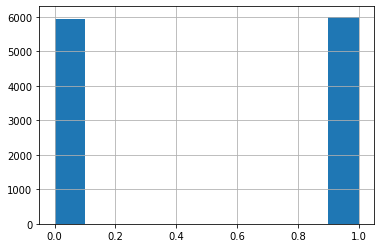

In [7]:
# Target variable should be perfectly balanced
df.win.hist()

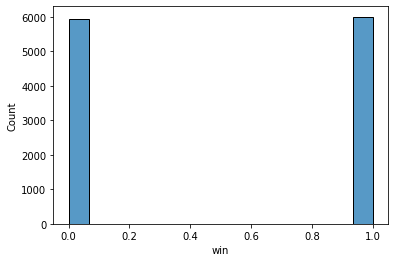

In [8]:
sb.histplot(data = df, x= 'win')

In [9]:
# Removing unnesesary columns 
df.drop(['playoffGame','shootout','gameDate','team','name','playerTeam','opposingTeam','position','situation',
         'goalsFor','goalsAgainst'],axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
# Removing duplicate games
df.drop_duplicates(subset=['gameId'],inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# Saving this for later in project when adding both the home and away team stats on one row as well as 10 game running averages
df.to_csv('prepped_data.csv')

In [11]:
df.gameId.sort_values(ascending=False)

6326     2021021312
22126    2021021309
49986    2021021308
33506    2021021307
63586    2021021306
            ...    
63921    2008020005
6336     2008020004
6        2008020003
6331     2008020002
1        2008020001
Name: gameId, Length: 9584, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [13]:
X1 = pd.get_dummies(df)

In [14]:
X = X1.drop('win',axis = 1)
y = X1['win']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [17]:
ypred = model.predict(X_test)
yproba = model.predict_proba(X_test)

In [18]:
print(confusion_matrix(y_test,ypred))
log_loss(y_test,yproba)

[[   0 1436]
 [   0 1440]]


0.6932374216416595

In [19]:
# Model was overfitting. Checking feature importance
corel = X1.corr()['win'].sort_values(ascending=False)
corel.head(20)

win                                      1.000000
mediumDangerGoalsFor                     0.401414
highDangerGoalsFor                       0.383745
xGoalsPercentage                         0.372695
lowDangerGoalsFor                        0.341771
flurryScoreVenueAdjustedxGoalsFor        0.329503
scoreFlurryAdjustedTotalShotCreditFor    0.315980
scoreVenueAdjustedxGoalsFor              0.306401
scoreAdjustedTotalShotCreditFor          0.299903
flurryAdjustedxGoalsFor                  0.284535
highDangerxGoalsFor                      0.264286
xGoalsFor                                0.263235
totalShotCreditFor                       0.251708
reboundGoalsFor                          0.226103
highDangerShotsFor                       0.224666
blockedShotAttemptsAgainst               0.205228
savedUnblockedShotAttemptsAgainst        0.171477
playContinuedInZoneAgainst               0.165873
lowDangerShotsAgainst                    0.165624
savedShotsOnGoalAgainst                  0.158026


In [20]:
# Selecting top 10 features by coefficient and using them to create a new logistic regression model
X_train.columns

Index(['season', 'gameId', 'xGoalsPercentage', 'corsiPercentage',
       'fenwickPercentage', 'iceTime', 'xOnGoalFor', 'xGoalsFor',
       'xReboundsFor', 'xFreezeFor',
       ...
       'scoreAdjustedUnblockedShotAttemptsAgainst', 'dZoneGiveawaysAgainst',
       'xGoalsFromxReboundsOfShotsAgainst',
       'xGoalsFromActualReboundsOfShotsAgainst', 'reboundxGoalsAgainst',
       'totalShotCreditAgainst', 'scoreAdjustedTotalShotCreditAgainst',
       'scoreFlurryAdjustedTotalShotCreditAgainst', 'home_or_away_AWAY',
       'home_or_away_HOME'],
      dtype='object', length=102)

In [21]:
XX = X1[['xGoalsPercentage','flurryScoreVenueAdjustedxGoalsFor','scoreFlurryAdjustedTotalShotCreditFor','scoreVenueAdjustedxGoalsFor'
,'scoreAdjustedTotalShotCreditFor','flurryAdjustedxGoalsFor','highDangerxGoalsFor','xGoalsFor','reboundGoalsFor','highDangerShotsFor','savedUnblockedShotAttemptsAgainst'
,'savedShotsOnGoalAgainst']]

In [22]:
XX.shape

(9584, 12)

In [23]:
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, random_state=1)

In [24]:
model_opt = LogisticRegression(solver='liblinear')
model_opt.fit(XX_train,y_train)

LogisticRegression(solver='liblinear')

In [25]:
y_pred = model_opt.predict(XX_test)
y_proba = model_opt.predict_proba(XX_test)

In [26]:
log_loss(y_test,y_proba)

0.4582134126018098

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1436
           1       0.78      0.80      0.79      1440

    accuracy                           0.79      2876
   macro avg       0.79      0.79      0.79      2876
weighted avg       0.79      0.79      0.79      2876



In [28]:
confusion_matrix(y_test,y_pred)

array([[1119,  317],
       [ 291, 1149]])

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, model_opt.predict_proba(XX_test)[:,1])

0.8676386954503249

kNN

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = MinMaxScaler()
fitting = scaler.fit_transform(XX)

Xk = pd.DataFrame(fitting, columns=XX.columns)

In [31]:
Xk_train, Xk_test, y_train, y_test = train_test_split(Xk, y, test_size=0.3,random_state=1)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xk_train, y_train)
y_pred_k = knn.predict(Xk_test)
y_proba_k = knn.predict_proba(Xk_test)

In [32]:
print(roc_auc_score(y_test,y_proba_k[:,1]))
print(confusion_matrix(y_test,y_pred_k))
print(classification_report(y_test,y_pred_k))

0.7645112774682761
[[ 995  441]
 [ 397 1043]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1436
           1       0.70      0.72      0.71      1440

    accuracy                           0.71      2876
   macro avg       0.71      0.71      0.71      2876
weighted avg       0.71      0.71      0.71      2876



In [33]:
log_loss(y_test,y_proba_k)

2.0871007748270105

Boosted Tree

In [34]:
from sklearn.ensemble import AdaBoostClassifier

boosted_tree = AdaBoostClassifier(n_estimators=100)
boosted_tree.fit(Xk_train,y_train)
y_pred_bt = boosted_tree.predict(Xk_test)
y_proba_bt = boosted_tree.predict_proba(Xk_test)

In [35]:
print(roc_auc_score(y_test,y_proba_bt[:,1]))
print(confusion_matrix(y_test,y_pred_bt))
print(classification_report(y_test,y_pred_bt))
print(log_loss(y_test,y_proba_bt))

0.8368113587124729
[[1083  353]
 [ 343 1097]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1436
           1       0.76      0.76      0.76      1440

    accuracy                           0.76      2876
   macro avg       0.76      0.76      0.76      2876
weighted avg       0.76      0.76      0.76      2876

0.6877390682641799


Random Forrest

In [36]:
from sklearn.ensemble import RandomForestClassifier

random_forest  = RandomForestClassifier(max_depth=5, random_state=0)
random_forest.fit(Xk_train,y_train)
y_pred_rf = random_forest.predict(Xk_test)
y_proba_rf = random_forest.predict_proba(Xk_test)

In [37]:
print(roc_auc_score(y_test,y_proba_rf[:,1]))
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print(log_loss(y_test,y_proba_rf))

0.7879768260600433
[[1007  429]
 [ 377 1063]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      1436
           1       0.71      0.74      0.73      1440

    accuracy                           0.72      2876
   macro avg       0.72      0.72      0.72      2876
weighted avg       0.72      0.72      0.72      2876

0.5659276333092153


ANN

In [38]:
from sklearn.neural_network import MLPClassifier

MLPC_model = MLPClassifier(hidden_layer_sizes=65, activation='logistic', solver='adam', random_state=1)
MLPC_model.fit(Xk_train, y_train)
y_pred_mlpc = MLPC_model.predict(Xk_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))
print(log_loss(y_test,y_pred_mlpc))
print(roc_auc_score(y_test,y_pred_mlpc))

[[1122  314]
 [ 348 1092]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1436
           1       0.78      0.76      0.77      1440

    accuracy                           0.77      2876
   macro avg       0.77      0.77      0.77      2876
weighted avg       0.77      0.77      0.77      2876

7.950250711760764
0.7698351903435469


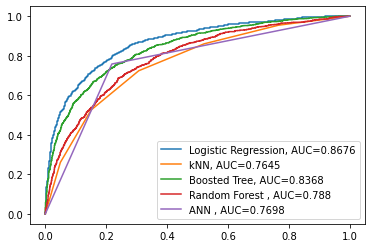

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn import metrics
#log
fpr, tpr, _ = metrics.roc_curve(y_test,  model_opt.predict_proba(XX_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, model_opt.predict_proba(XX_test)[:,1] ), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
#kNN
fpr, tpr, _ = metrics.roc_curve(y_test, knn.predict_proba(Xk_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, knn.predict_proba(Xk_test)[:,1] ), 4)
plt.plot(fpr,tpr,label="kNN, AUC="+str(auc))
# Boosted Tree
fpr, tpr, _ = metrics.roc_curve(y_test, boosted_tree.predict_proba(Xk_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, boosted_tree.predict_proba(Xk_test)[:,1] ), 4)
plt.plot(fpr,tpr,label="Boosted Tree, AUC="+str(auc))
# Random Forest
fpr, tpr, _ = metrics.roc_curve(y_test, random_forest.predict_proba(Xk_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, random_forest.predict_proba(Xk_test)[:,1] ), 4)
plt.plot(fpr,tpr,label="Random Forest , AUC="+str(auc))
#ANN
fpr, tpr, _ = metrics.roc_curve(y_test, MLPC_model.predict(Xk_test))
auc = round(metrics.roc_auc_score(y_test, MLPC_model.predict(Xk_test) ), 4)
plt.plot(fpr,tpr,label="ANN , AUC="+str(auc))
plt.legend()

Preprocessed a new Dataset. New dataset uses exactly the same data as the prior except I removed game by game data and created 10 game rolling averages with the game by game stats instead. I also addressed the issue where both home and away statistics werent on the same row. Recreating models with new dataset

In [164]:
prep

,xGoal%Run,Corsi%Run,Fen%Run,xGoalsForRun,FSVAdjustedxGoalRun,SogRun,GoalsForRun,SavedShotsRun,SavedUnblockedShotsRun,GoalsAgainstRun,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,0.50726,0.53117,0.53826,2.5045,2.5295,29.8,3.0,26.8,38.7,2.7,...,0.45481,0.45460,0.44968,2.5657,2.3447,29.5,2.8,26.7,38.9,3.3
1,0.45481,0.45460,0.44968,2.5657,2.3447,29.5,2.8,26.7,38.9,3.3,...,0.50726,0.53117,0.53826,2.5045,2.5295,29.8,3.0,26.8,38.7,2.7
2,0.48884,0.51236,0.51644,2.4003,2.4918,28.1,3.2,24.9,35.9,1.5,...,0.54158,0.49099,0.49263,3.1641,2.9474,30.0,3.0,27.0,40.2,2.6
3,0.54158,0.49099,0.49263,3.1641,2.9474,30.0,3.0,27.0,40.2,2.6,...,0.48884,0.51236,0.51644,2.4003,2.4918,28.1,3.2,24.9,35.9,1.5
4,0.43599,0.43434,0.44148,2.2016,2.2778,25.7,3.5,22.2,31.8,2.2,...,0.54332,0.52716,0.53018,2.9382,2.7642,30.7,2.8,27.9,39.4,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19447,0.48156,0.52473,0.53452,2.5851,2.5883,32.4,2.8,29.6,42.2,3.5,...,0.45576,0.49857,0.49809,2.6553,2.5512,32.1,2.1,30.0,43.2,2.9
19448,0.35018,0.41808,0.39823,2.1021,1.9214,24.2,2.1,22.1,33.6,4.2,...,0.55107,0.54011,0.54216,3.5756,3.6153,36.7,4.3,32.4,44.9,3.9
19449,0.50208,0.47386,0.47879,3.2323,3.2564,29.0,3.6,25.4,38.7,3.9,...,0.60106,0.57818,0.56233,3.4950,3.3067,31.7,2.8,28.9,44.9,2.1
19450,0.47233,0.49883,0.49072,2.8518,2.6742,30.1,2.4,27.7,39.4,3.2,...,0.38806,0.43492,0.42106,2.6638,2.6360,28.7,2.2,26.5,37.2,3.8


Logistic Regression

In [206]:
prep = pd.read_csv('prepped_data.csv')

In [207]:
corel = prep.corr()['Win'].sort_values(ascending=False)
corel.head(20)

Win                       1.000000
xGoal%Run                 0.121039
Fen%Run                   0.117349
Corsi%Run                 0.110774
xGoalsForRun              0.093879
FSVAdjustedxGoalRun       0.090404
GoalsForRun               0.086438
SogRun                    0.084325
SavedUnblockedShotsRun    0.079273
SavedShotsRun             0.070024
O10                       0.008292
O5                        0.005440
O4                       -0.004754
O8                       -0.006808
O9                       -0.008847
O6                       -0.009173
O7                       -0.013043
O1                       -0.015455
O3                       -0.016344
O2                       -0.016687
Name: Win, dtype: float64

In [208]:
prep.shape

(19452, 21)

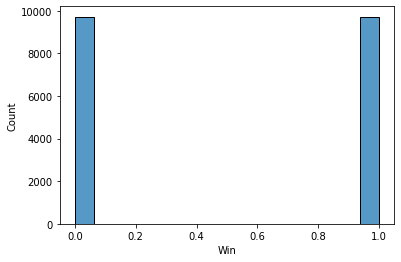

In [209]:
sb.histplot(data = prep, x= 'Win')

In [210]:
X = prep.drop(['Win'],axis = 1)
y = prep['Win']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [212]:
model1 = LogisticRegression(solver='liblinear')
model1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [213]:
ypred = model1.predict(X_test)
yproba = model1.predict_proba(X_test)

In [214]:
print(confusion_matrix(y_test,ypred))
log_loss(y_test,yproba)

[[1594 1310]
 [1327 1605]]


0.6856763633079157

In [215]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      2904
           1       0.55      0.55      0.55      2932

    accuracy                           0.55      5836
   macro avg       0.55      0.55      0.55      5836
weighted avg       0.55      0.55      0.55      5836



In [216]:
print(roc_auc_score(y_test,ypred))

0.5481529921564648


kNN

In [217]:
scaler = MinMaxScaler()
fitting = scaler.fit_transform(X)

X = pd.DataFrame(fitting, columns=X.columns)

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

knn = KNeighborsClassifier(n_neighbors=97, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_k = knn.predict(X_test)
y_proba_k = knn.predict_proba(X_test)

In [ ]:
print(roc_auc_score(y_test,y_proba_k[:,1]))
print(confusion_matrix(y_test,y_pred_k))
print(classification_report(y_test,y_pred_k))
print(log_loss(y_test,y_proba_k))

In [55]:
from sklearn.model_selection import cross_val_score

maxk = 100
cv_scores = [ ]

for K in range(1,maxk):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

In [56]:
cv_scores.index(max(cv_scores))+1

97

Boosted Tree

In [220]:
boosted_tree = AdaBoostClassifier(n_estimators=24)
boosted_tree.fit(X_train,y_train)
y_pred_bt = boosted_tree.predict(X_test)
y_proba_bt = boosted_tree.predict_proba(X_test)

In [221]:
print(roc_auc_score(y_test,y_proba_bt[:,1]))
print(confusion_matrix(y_test,y_pred_bt))
print(classification_report(y_test,y_pred_bt))
print(log_loss(y_test,y_proba_bt))

0.5571124435787868
[[1514 1390]
 [1280 1652]]
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      2904
           1       0.54      0.56      0.55      2932

    accuracy                           0.54      5836
   macro avg       0.54      0.54      0.54      5836
weighted avg       0.54      0.54      0.54      5836

0.6916070791050989


Random Forest

In [222]:
random_forest  = RandomForestClassifier(max_depth=5, random_state=0)
random_forest.fit(X_train,y_train)
y_pred_rf = random_forest.predict(X_test)
y_proba_rf = random_forest.predict_proba(X_test)

In [235]:
print(roc_auc_score(y_test,y_proba_rf[:,1]))
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print(log_loss(y_test,y_proba_rf))

0.565604810977191
[[1501 1403]
 [1244 1688]]
              precision    recall  f1-score   support

           0       0.55      0.52      0.53      2904
           1       0.55      0.58      0.56      2932

    accuracy                           0.55      5836
   macro avg       0.55      0.55      0.55      5836
weighted avg       0.55      0.55      0.55      5836

0.6868483734828436


<function matplotlib.pyplot.legend(*args, **kwargs)>

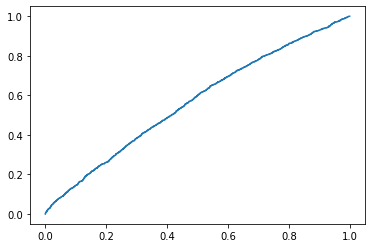

In [232]:
random_roc_auc = roc_auc_score(y_test, y_proba_rf[:,1])
auc = round(metrics.roc_auc_score(y_test,y_pred_rf), 4)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf[:,1])
plt.plot(fpr,tpr,label="Random Forest , AUC="+str(auc))
plt.legend

In [234]:
roc_auc_score(y_test, random_forest.predict(X_test))

0.5462947564445145

Prelim ANN

In [61]:
MLPC_model = MLPClassifier(hidden_layer_sizes=1000, activation='logistic', solver='adam', random_state=1)
MLPC_model.fit(X_train, y_train)
y_pred_mlpc = MLPC_model.predict(X_test)

In [62]:
print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))
print(roc_auc_score(y_test,y_pred_mlpc))
print(log_loss(y_test,y_pred_mlpc))

[[2159  745]
 [1957  975]]
              precision    recall  f1-score   support

           0       0.52      0.74      0.62      2904
           1       0.57      0.33      0.42      2932

    accuracy                           0.54      5836
   macro avg       0.55      0.54      0.52      5836
weighted avg       0.55      0.54      0.52      5836

0.537997408664344
15.991153104717986


ANN Goin In

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [64]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [65]:
model.fit(x=X_train, 
          y=y_train,
          batch_size=128, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/100
107/107 [==============================] - 1s 5ms/step - loss: 0.6880 - val_loss: 0.6879
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6857 - val_loss: 0.6868
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6847 - val_loss: 0.6866
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6847 - val_loss: 0.6865
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6839 - val_loss: 0.6903
Epoch 6/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6838 - val_loss: 0.6863
Epoch 7/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6832 - val_loss: 0.6865
Epoch 8/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6833 - val_loss: 0.6865
Epoch 9/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6832 - val_loss: 0.6865
Epoch 10/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6830 - val_lo

In [161]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

TypeError: ignored

In [160]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [68]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [69]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=128,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
107/107 [==============================] - 1s 4ms/step - loss: 0.7106 - val_loss: 0.6908
Epoch 2/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6912 - val_loss: 0.6892
Epoch 3/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6900 - val_loss: 0.6904
Epoch 4/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6902 - val_loss: 0.6893
Epoch 5/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6895 - val_loss: 0.6889
Epoch 6/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6896 - val_loss: 0.6891
Epoch 7/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6895 - val_loss: 0.6882
Epoch 8/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6882 - val_loss: 0.6887
Epoch 9/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6890 - val_loss: 0.6888
Epoch 10/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6891 - val_lo

In [159]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

TypeError: ignored

In [71]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

183/183 [==============================] - 0s 1ms/step


In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.59      0.57      2904
           1       0.55      0.50      0.53      2932

    accuracy                           0.55      5836
   macro avg       0.55      0.55      0.55      5836
weighted avg       0.55      0.55      0.55      5836



In [73]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(log_loss(y_test,y_pred))

[[1726 1178]
 [1468 1464]]
              precision    recall  f1-score   support

           0       0.54      0.59      0.57      2904
           1       0.55      0.50      0.53      2932

    accuracy                           0.55      5836
   macro avg       0.55      0.55      0.55      5836
weighted avg       0.55      0.55      0.55      5836

0.5468352444198904
15.659791683808507


ANother try

In [111]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [112]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [113]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=128,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
107/107 [==============================] - 2s 9ms/step - loss: 0.6903 - val_loss: 0.6889
Epoch 2/100
107/107 [==============================] - 1s 6ms/step - loss: 0.6861 - val_loss: 0.6875
Epoch 3/100
107/107 [==============================] - 1s 7ms/step - loss: 0.6858 - val_loss: 0.6870
Epoch 4/100
107/107 [==============================] - 1s 6ms/step - loss: 0.6846 - val_loss: 0.6891
Epoch 5/100
107/107 [==============================] - 1s 6ms/step - loss: 0.6850 - val_loss: 0.6877
Epoch 6/100
107/107 [==============================] - 1s 6ms/step - loss: 0.6842 - val_loss: 0.6866
Epoch 7/100
107/107 [==============================] - 1s 5ms/step - loss: 0.6839 - val_loss: 0.6864
Epoch 8/100
107/107 [==============================] - 1s 5ms/step - loss: 0.6845 - val_loss: 0.6865
Epoch 9/100
107/107 [==============================] - 1s 6ms/step - loss: 0.6835 - val_loss: 0.6876
Epoch 10/100
107/107 [==============================] - 1s 6ms/step - loss: 0.6837 - val_lo

In [114]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

183/183 [==============================] - 0s 1ms/step


In [115]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(log_loss(y_test,y_pred))

[[1831 1073]
 [1602 1330]]
              precision    recall  f1-score   support

           0       0.53      0.63      0.58      2904
           1       0.55      0.45      0.50      2932

    accuracy                           0.54      5836
   macro avg       0.54      0.54      0.54      5836
weighted avg       0.54      0.54      0.54      5836

0.5420624607729284
15.83140589863411


Trying again editing nodes

In [186]:
model = Sequential()

model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=75,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [187]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=64,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
213/213 [==============================] - 2s 4ms/step - loss: 0.6969 - val_loss: 0.6928
Epoch 2/100
213/213 [==============================] - 1s 4ms/step - loss: 0.6933 - val_loss: 0.6930
Epoch 3/100
213/213 [==============================] - 1s 4ms/step - loss: 0.6922 - val_loss: 0.6918
Epoch 4/100
213/213 [==============================] - 1s 4ms/step - loss: 0.6920 - val_loss: 0.6912
Epoch 5/100
213/213 [==============================] - 1s 3ms/step - loss: 0.6915 - val_loss: 0.6912
Epoch 6/100
213/213 [==============================] - 1s 3ms/step - loss: 0.6900 - val_loss: 0.6890
Epoch 7/100
213/213 [==============================] - 1s 4ms/step - loss: 0.6894 - val_loss: 0.6893
Epoch 8/100
213/213 [==============================] - 1s 3ms/step - loss: 0.6881 - val_loss: 0.6876
Epoch 9/100
213/213 [==============================] - 1s 4ms/step - loss: 0.6899 - val_loss: 0.6893
Epoch 10/100
213/213 [==============================] - 1s 4ms/step - loss: 0.6886 - val_lo

In [188]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

183/183 [==============================] - 0s 1ms/step


In [189]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(log_loss(y_test,y_pred))

[[1771 1133]
 [1537 1395]]
              precision    recall  f1-score   support

           0       0.54      0.61      0.57      2904
           1       0.55      0.48      0.51      2932

    accuracy                           0.54      5836
   macro avg       0.54      0.54      0.54      5836
weighted avg       0.54      0.54      0.54      5836

0.5428164661623052
15.801822981202866


Visualizations

In [80]:
prep

,xGoal%Run,Corsi%Run,Fen%Run,xGoalsForRun,FSVAdjustedxGoalRun,SogRun,GoalsForRun,SavedShotsRun,SavedUnblockedShotsRun,GoalsAgainstRun,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,0.50726,0.53117,0.53826,2.5045,2.5295,29.8,3.0,26.8,38.7,2.7,...,0.45481,0.45460,0.44968,2.5657,2.3447,29.5,2.8,26.7,38.9,3.3
1,0.45481,0.45460,0.44968,2.5657,2.3447,29.5,2.8,26.7,38.9,3.3,...,0.50726,0.53117,0.53826,2.5045,2.5295,29.8,3.0,26.8,38.7,2.7
2,0.48884,0.51236,0.51644,2.4003,2.4918,28.1,3.2,24.9,35.9,1.5,...,0.54158,0.49099,0.49263,3.1641,2.9474,30.0,3.0,27.0,40.2,2.6
3,0.54158,0.49099,0.49263,3.1641,2.9474,30.0,3.0,27.0,40.2,2.6,...,0.48884,0.51236,0.51644,2.4003,2.4918,28.1,3.2,24.9,35.9,1.5
4,0.43599,0.43434,0.44148,2.2016,2.2778,25.7,3.5,22.2,31.8,2.2,...,0.54332,0.52716,0.53018,2.9382,2.7642,30.7,2.8,27.9,39.4,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19447,0.48156,0.52473,0.53452,2.5851,2.5883,32.4,2.8,29.6,42.2,3.5,...,0.45576,0.49857,0.49809,2.6553,2.5512,32.1,2.1,30.0,43.2,2.9
19448,0.35018,0.41808,0.39823,2.1021,1.9214,24.2,2.1,22.1,33.6,4.2,...,0.55107,0.54011,0.54216,3.5756,3.6153,36.7,4.3,32.4,44.9,3.9
19449,0.50208,0.47386,0.47879,3.2323,3.2564,29.0,3.6,25.4,38.7,3.9,...,0.60106,0.57818,0.56233,3.4950,3.3067,31.7,2.8,28.9,44.9,2.1
19450,0.47233,0.49883,0.49072,2.8518,2.6742,30.1,2.4,27.7,39.4,3.2,...,0.38806,0.43492,0.42106,2.6638,2.6360,28.7,2.2,26.5,37.2,3.8


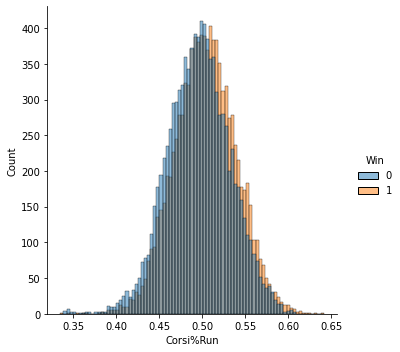

In [86]:
import seaborn as sb
sb.displot(prep, x="Corsi%Run", hue="Win")

183/183 [==============================] - 0s 1ms/step


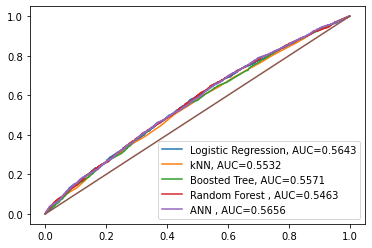

In [233]:
#log
fpr, tpr, _ = metrics.roc_curve(y_test,  model1.predict_proba(X_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, model1.predict_proba(X_test)[:,1] ), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
#kNN
fpr, tpr, _ = metrics.roc_curve(y_test, knn.predict_proba(X_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, knn.predict_proba(X_test)[:,1] ), 4)
plt.plot(fpr,tpr,label="kNN, AUC="+str(auc))
# Boosted Tree
fpr, tpr, _ = metrics.roc_curve(y_test, boosted_tree.predict_proba(X_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, boosted_tree.predict_proba(X_test)[:,1] ), 4)
plt.plot(fpr,tpr,label="Boosted Tree, AUC="+str(auc))
# Rand
random_roc_auc = roc_auc_score(y_test, y_proba_rf[:,1])
auc = round(metrics.roc_auc_score(y_test,y_pred_rf), 4)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf[:,1])
plt.plot(fpr,tpr,label="Random Forest , AUC="+str(auc))
#ANN
fpr, tpr, _ = metrics.roc_curve(y_test, model.predict(X_test))
auc = round(metrics.roc_auc_score(y_test, model.predict(X_test)), 4)
plt.plot(fpr,tpr,label="ANN , AUC="+str(auc))
plt.plot([0, 1], [0, 1])
plt.legend()

183/183 [==============================] - 0s 1ms/step


<function matplotlib.pyplot.legend(*args, **kwargs)>

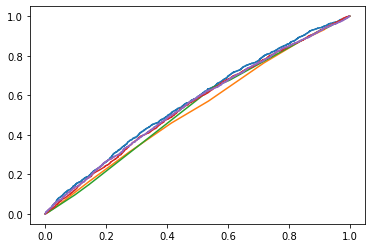

In [205]:

fpr, tpr, _ = metrics.roc_curve(y_test,  model1.predict_proba(X_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, model1.predict_proba(X_test)[:,1] ), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
#kNN
fpr, tpr, _ = metrics.roc_curve(y_test, knn.predict_proba(X_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, knn.predict_proba(X_test)[:,1] ), 4)
plt.plot(fpr,tpr,label="kNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, boosted_tree.predict_proba(X_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, boosted_tree.predict_proba(X_test)[:,1] ), 4)
plt.plot(fpr,tpr,label="Boosted Tree, AUC="+str(auc))

random_roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
auc = round(metrics.roc_auc_score(y_test, random_forest.predict(X_test)), 4)
plt.plot(fpr,tpr,label="Random Forest , AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, model.predict(X_test))
auc = round(metrics.roc_auc_score(y_test, model.predict(X_test)), 4)
plt.plot(fpr,tpr,label="ANN , AUC="+str(auc))
plt.legend